<a href="https://colab.research.google.com/github/SAIKISHORE-MUNGARA/SAIKISHORE-MUNGARA/blob/main/titanic_udmy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##IMPORTING LIBRARIES

In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Titanic Data

In [392]:
titanic = pd.read_csv('titanic_train.csv')

In [393]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [394]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


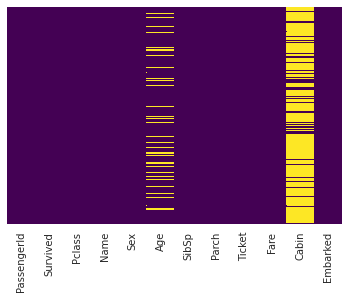

In [395]:
sns.heatmap(titanic.isnull(), yticklabels = False , cmap = 'viridis', cbar = False)

# Data Visualization

### Here the columns survived ,sex , Pclass, SibSip, Parch comes under categorical data. 


<Figure size 720x432 with 0 Axes>

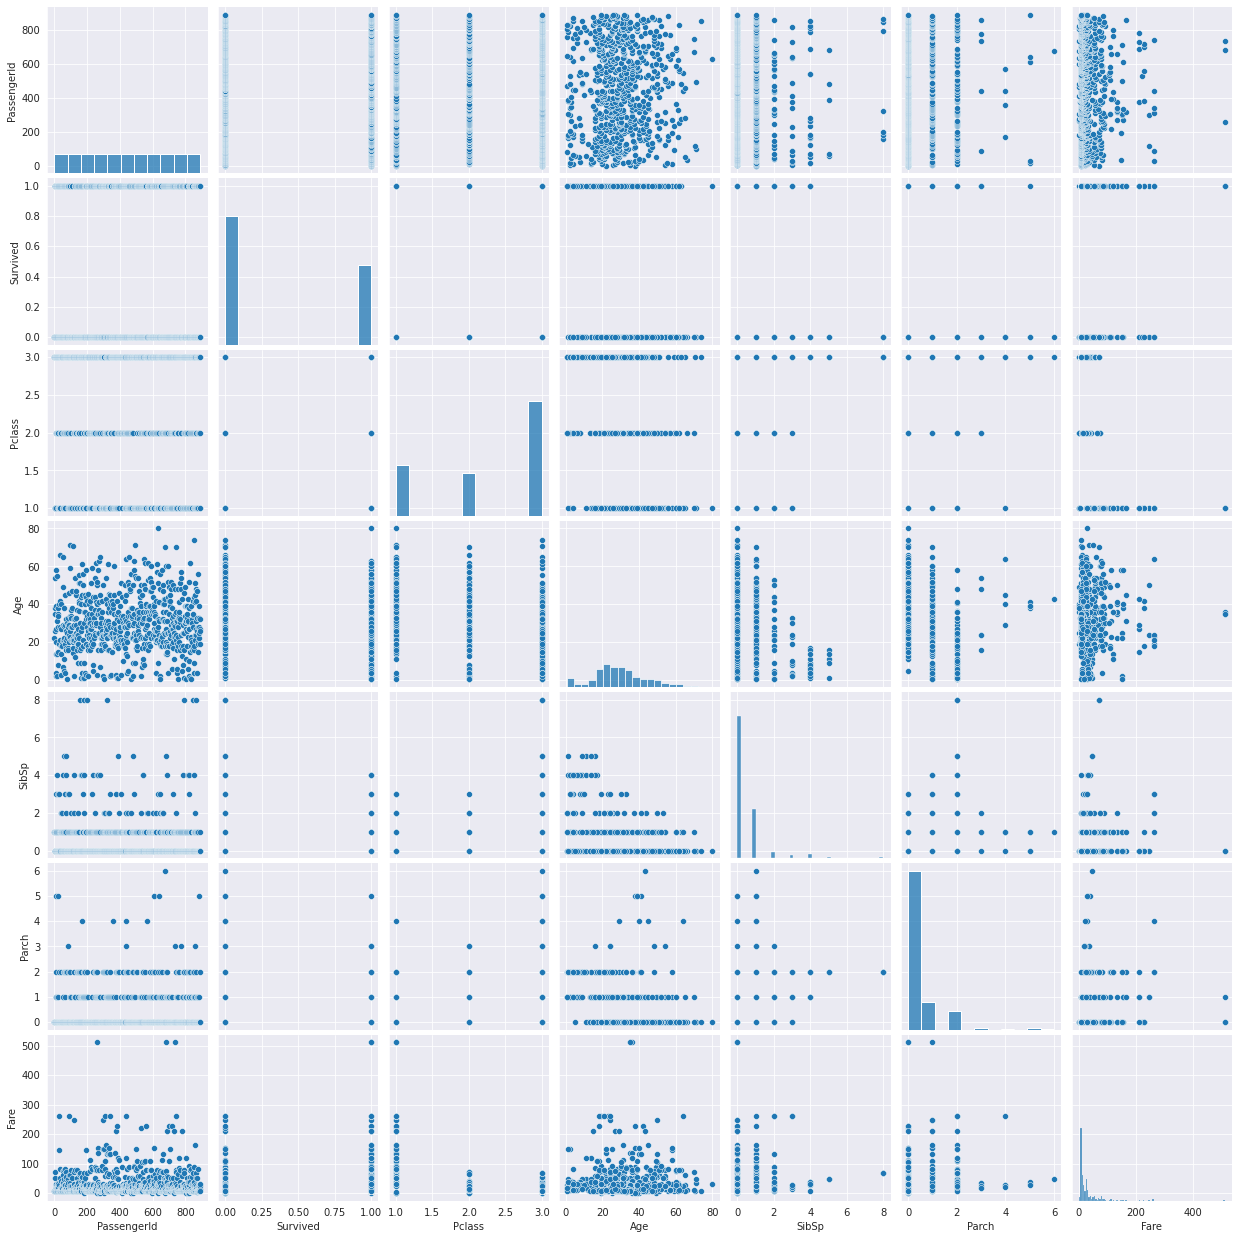

In [396]:
fig = plt.figure(figsize=(10,6))
sns.pairplot(titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


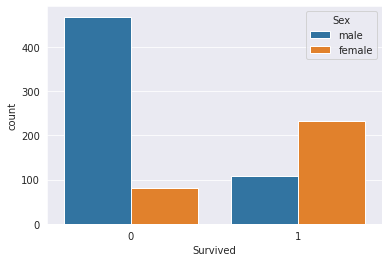

In [397]:
sns.set_style('darkgrid')
sns.countplot('Survived', hue = 'Sex', data = titanic)  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


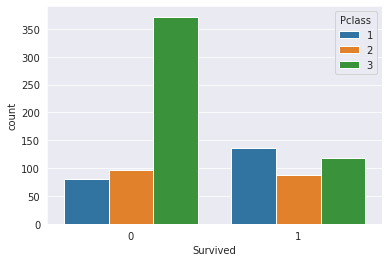

In [398]:
sns.countplot('Survived', hue = 'Pclass', data = titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


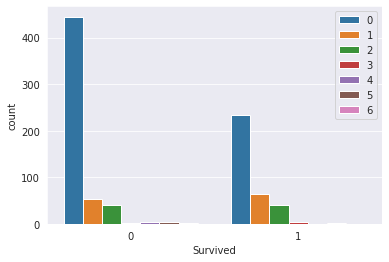

In [399]:
sns.countplot('Survived', hue = 'Parch', data = titanic).legend(loc=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


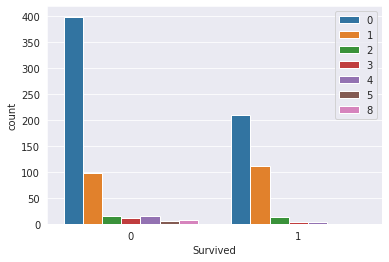

In [400]:
sns.countplot('Survived', hue = 'SibSp', data = titanic).legend(loc=1)

# data cleaning

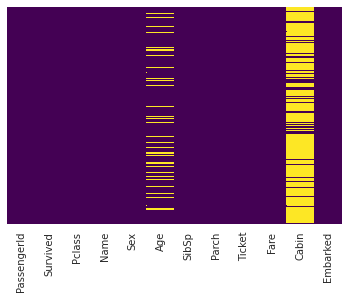

In [401]:
sns.heatmap(titanic.isnull(), yticklabels = False , cmap = 'viridis', cbar = False)

In [402]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [403]:
print(titanic[titanic['Pclass']==1]['Age'].mean(),
titanic[titanic['Pclass']==2]['Age'].mean(),
titanic[titanic['Pclass']==3]['Age'].mean())

38.233440860215055 29.87763005780347 25.14061971830986


In [404]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38.23
        elif Pclass == 2:
            return 29.88
        elif Pclass == 3:
            return 25.14
    else : return Age

In [405]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age, axis = 1)


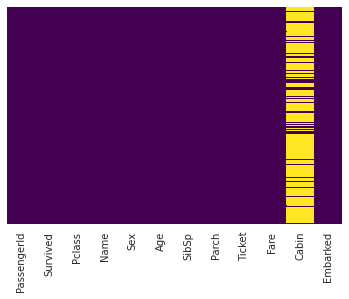

In [406]:
sns.heatmap(titanic.isnull(), yticklabels = False , cmap = 'viridis', cbar = False)

In [407]:
titanic.drop('Cabin', inplace = True, axis = 1)

In [408]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [409]:
titanic.dropna(inplace=True)

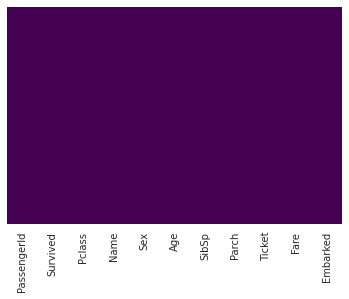

In [410]:
sns.heatmap(titanic.isnull(), yticklabels = False , cmap = 'viridis', cbar = False)

In [411]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##data modification

In [412]:
Sex =  pd.get_dummies(titanic['Sex'],drop_first = True)
Embarked = pd.get_dummies(titanic['Embarked'],drop_first = True)
Pclass = pd.get_dummies(titanic['Pclass'],drop_first = True)
titanic['Family'] = titanic['SibSp']+titanic['Parch']

In [413]:
titanic.drop(['Sex', 'Name','Ticket','Embarked','Pclass','SibSp','Parch'], axis = 1,inplace = True)

In [414]:
titanic = pd.concat([titanic,Sex,Pclass,Embarked],axis=1)

In [415]:
titanic.head()

,PassengerId,Survived,Age,Fare,Family,male,2,3,Q,S
0,1,0,22.0,7.2500,1,1,0,1,0,1
1,2,1,38.0,71.2833,1,0,0,0,0,0
2,3,1,26.0,7.9250,0,0,0,1,0,1
3,4,1,35.0,53.1000,1,0,0,0,0,1
4,5,0,35.0,8.0500,0,1,0,1,0,1


# train_test_split

In [416]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic.drop(['Survived','PassengerId'],axis=1),titanic['Survived'], 
                                                    test_size=0.30, random_state=101)


In [417]:
X_train.head(10)

,Age,Fare,Family,male,2,3,Q,S
807,18.00,7.7750,0,0,0,1,0,1
651,18.00,23.0000,1,0,1,0,0,1
2,26.00,7.9250,0,0,0,1,0,1
690,31.00,57.0000,1,1,0,0,0,1
196,25.14,7.7500,0,1,0,1,1,0
888,25.14,23.4500,3,0,0,1,0,1
258,35.00,512.3292,0,0,0,0,0,0
39,14.00,11.2417,1,0,0,1,0,0
235,25.14,7.5500,0,0,0,1,0,1
299,50.00,247.5208,1,0,0,0,0,0


# Feature Scaling

In [418]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train.iloc[:,:3] = scaler.fit_transform(X_train.iloc[:,:3])
X_test.iloc[:,:3] = scaler.transform(X_test.iloc[:,:3])

In [419]:
X_test.head()

,Age,Fare,Family,male,2,3,Q,S
511,-0.322648,-0.476489,-0.563229,1,0,1,0,1
613,-0.322648,-0.482352,-0.563229,1,0,1,1,0
615,-0.411375,0.636447,1.310185,0,1,0,0,1
337,0.911749,1.994640,-0.563229,0,0,0,0,0
718,-0.322648,-0.330898,-0.563229,1,0,1,1,0


#LogisticRegression

In [420]:
from sklearn.linear_model import LogisticRegression

In [421]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [422]:
predictions = logmodel.predict(X_test)

In [423]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [424]:
y_pred = pd.DataFrame(predictions)

In [425]:
from sklearn.metrics import classification_report

In [426]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.83      0.67      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.82       267



#test data

In [427]:
test_act = pd.read_csv('titanic_test.csv')

In [428]:
test_act

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [429]:
test_act.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [430]:
Xact_test = test_act[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [431]:
Xact_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [432]:
Xact_test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

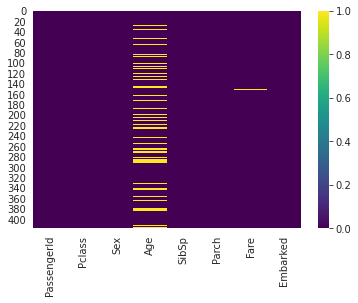

In [433]:
sns.heatmap(Xact_test.isnull(),cmap='viridis' )


In [434]:
Sex =  pd.get_dummies(Xact_test['Sex'],drop_first = True)

Embarked = pd.get_dummies(Xact_test['Embarked'],drop_first = True)

Xact_test.drop(['Sex','Embarked'], axis = 1,inplace = True)

Xact_test

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500
414,1306,1,39.0,0,0,108.9000
415,1307,3,38.5,0,0,7.2500
416,1308,3,NaN,0,0,8.0500


In [435]:
Xact_test = pd.concat([Xact_test,Sex,Embarked],axis=1)

In [436]:
Xact_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500,1,0,1
414,1306,1,39.0,0,0,108.9000,0,0,0
415,1307,3,38.5,0,0,7.2500,1,0,1
416,1308,3,NaN,0,0,8.0500,1,0,1


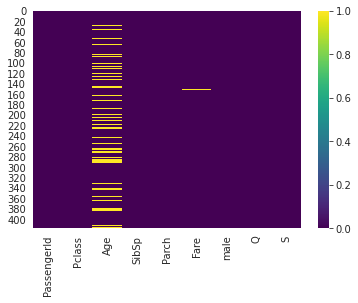

In [437]:
sns.heatmap(Xact_test.isnull(),cmap='viridis' )

In [438]:
print(Xact_test[Xact_test['Pclass']==1]['Age'].mean(),
Xact_test[Xact_test['Pclass']==2]['Age'].mean(),
Xact_test[Xact_test['Pclass']==3]['Age'].mean())

40.91836734693877 28.7775 24.02794520547945


In [439]:
def impute_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 40.92
        elif Pclass == 2:
            return 28.78
        elif Pclass == 3:
            return 24.03
    else : return Age

In [440]:
Xact_test['Age'] = Xact_test[['Age','Pclass']].apply(impute_age_test, axis = 1)

In [441]:
Xact_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.50,0,0,7.8292,1,1,0
1,893,3,47.00,1,0,7.0000,0,0,1
2,894,2,62.00,0,0,9.6875,1,1,0
3,895,3,27.00,0,0,8.6625,1,0,1
4,896,3,22.00,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,24.03,0,0,8.0500,1,0,1
414,1306,1,39.00,0,0,108.9000,0,0,0
415,1307,3,38.50,0,0,7.2500,1,0,1
416,1308,3,24.03,0,0,8.0500,1,0,1


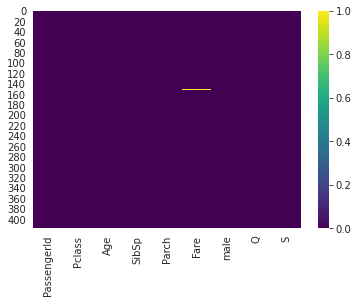

In [442]:
sns.heatmap(pd.isnull(Xact_test),cmap = 'viridis')

In [443]:
np.all((np.isfinite(Xact_test)))


False

In [444]:
col_mask=Xact_test.isnull().any(axis=0)
row_mask=Xact_test.isnull().any(axis=1)
Xact_test.loc[row_mask,col_mask]

,Fare
152,NaN


In [445]:
Xact_test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
male           0
Q              0
S              0
dtype: int64

In [446]:
Xact_test.loc[145:158,'Fare']

145     18.0000
146     51.8625
147      8.0500
148     26.5500
149     26.0000
150     83.1583
151      7.8958
152         NaN
153     12.1833
154     31.3875
155      7.5500
156    221.7792
157      7.8542
158     26.5500
Name: Fare, dtype: float64

In [447]:
Xact_test['Fare'].fillna(Xact_test['Fare'].mean(), inplace =True)

In [448]:
col_mask=Xact_test.isnull().any(axis=0)
row_mask=Xact_test.isnull().any(axis=1)
col_mask

PassengerId    False
Pclass         False
Age            False
SibSp          False
Parch          False
Fare           False
male           False
Q              False
S              False
dtype: bool

In [449]:
yact_test_pred = logmodel.predict(Xact_test)

ValueError: ignored

In [ ]:
yact_test_pred

In [ ]:
df = pd.DataFrame(yact_test_pred, columns = ['Survived'])
df

In [ ]:
log_reg_ans = pd.concat([Xact_test['PassengerId'], df], axis = 1)
log_reg_ans

In [ ]:
log_reg_ans.to_csv('log_reg_ans.csv', index = False)